<a href="https://colab.research.google.com/github/itsleeqian/COMP562-Project/blob/main/Medical_Costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Setting Up

##1.1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##1.2. Loading and Visualising Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Data pre-processing


## 2.1. Shape of the data

In [ ]:
f'There are {df.shape[0]} rows in the data.'

'There are 1338 rows in the data.'

## 2.2. Checking for null values in columns

In [ ]:
display(df.isnull().all())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

## 2.3. Checking for columns with only 1 unique value

In [ ]:
cols = df.columns
unique_value_count = [df[col].nunique() for col in df.columns]
unique_df = pd.DataFrame(list(zip(cols, unique_value_count)), columns=["column", "unique_values_count"])
unique_df[unique_df["unique_values_count"] == 1]

,column,unique_values_count


## 2.4. One hot encoding of categorical data


In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

df = encode_and_bind(df, 'region')

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0


## 2.5. Converting to binary data


In [ ]:
sex = {'male': 1,'female': 0}
df.sex = [sex[item] for item in df.sex]

smoker = {'yes': 1, 'no': 0}
df.smoker = [smoker[item] for item in df.smoker]

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


# 3. Correlation Finding


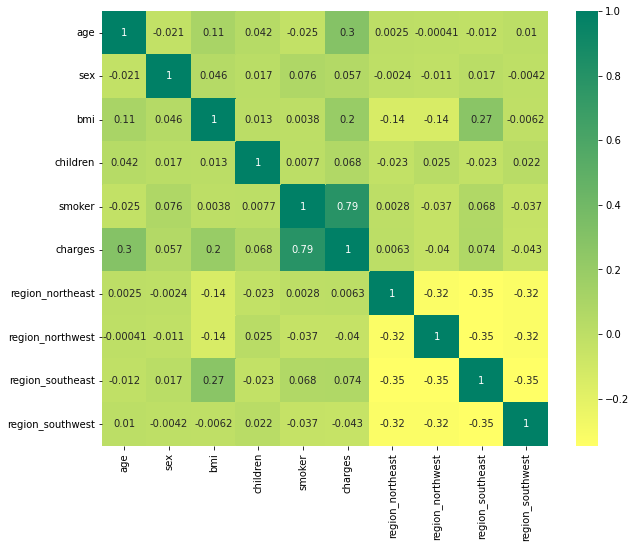

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')

# 4. Machine Learning Models



In [ ]:
# Convert data into matrix and vector

X = df.drop(['charges'], axis=1) # matrix
y = df['charges'] # result vector

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.0,0.321227,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.479150,0.2,0.0,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.458434,0.6,0.0,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.181464,0.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.347592,0.0,0.0,0.0,1.0,0.0,0.0


## 4.1 Multiple Linear Regression Model

In [ ]:
# We first split our data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
# Model training
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediction
y_pred_1 = model_1.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
42,6272.47720,4736.0
981,4500.33925,3968.0
98,22412.64850,32384.0
118,8601.32930,8064.0
90,2026.97410,5120.0


In [ ]:
# Evaluation of model

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_1))    
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))

Mean Absolute Error: 4219.416855149253
Root Mean Squared Error: 6088.473168401562


## 4.2. Ridge Regression

In [ ]:
# Model Training

from sklearn.linear_model import RidgeCV

model_2 = RidgeCV()
model_2.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [ ]:
# Prediction

y_pred_2 = model_2.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2})
pred_df.head()

,Actual,Predicted
511,2498.41440,5106.784035
535,6067.12675,7789.513604
259,33750.29180,26460.787729
767,7050.64200,8272.535825
749,3062.50825,5168.048846


In [ ]:
# Evaluating the Model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_2)))

Mean Absolute Error: 4047.1143061751663
Root Mean Squared Error: 5789.442990009001


## 4.3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_3 = RandomForestRegressor(n_estimators = 500) 
model_3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [ ]:
y_pred_3 = model_3.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3})
pred_df.head()

,Actual,Predicted
42,6272.47720,9456.519183
981,4500.33925,9182.490232
98,22412.64850,26695.844888
118,8601.32930,15229.802429
90,2026.97410,2133.665394


In [ ]:
# Evaluating the Model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_3)))



Mean Absolute Error: 2501.060729406677
Root Mean Squared Error: 4413.374905129888


## 4.4. Neural Network





In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def regressor():
  model = Sequential()
  model.add(Dense(20, input_dim=9, kernel_initializer='normal', activation='relu'))
  model.add(Dense(25, kernel_initializer='normal', activation='relu'))
  model.add(Dense(10, kernel_initializer='normal', activation='relu'))
  model.add(Dense(10, kernel_initializer='normal', activation='relu'))
  model.add(Dense(5, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [ ]:
model_4 = regressor()
model_4.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

In [ ]:
y_pred_4 = model_4.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_4.flatten()})
pred_df.head()



9/9 [==============================] - 0s 2ms/step


,Actual,Predicted
42,6272.47720,6818.906738
981,4500.33925,5148.171387
98,22412.64850,33611.324219
118,8601.32930,9381.504883
90,2026.97410,4922.817871


In [ ]:


# Evaluating the Model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_4)))



Mean Absolute Error: 4052.775718971986
Root Mean Squared Error: 6049.332222555414


## 4.5. Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVR

model_5_rbf = SVR(kernel='rbf')   # Here kernel used is RBF (Radial Basis Function)
model_5_rbf.fit(X_train, y_train)

model_5_linear = SVR(kernel='linear')   # Here kernel used is RBF (Radial Basis Function)
model_5_linear.fit(X_train, y_train)

model_5_poly = SVR(kernel='poly')   # Here kernel used is RBF (Radial Basis Function)
model_5_poly.fit(X_train, y_train)

SVR(kernel='poly')

In [ ]:
y_pred_5_rbf = model_5_rbf.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_5_rbf})
pred_df.head()

,Actual,Predicted
42,6272.47720,9372.911728
981,4500.33925,9386.738107
98,22412.64850,9457.840573
118,8601.32930,9381.409102
90,2026.97410,9352.224083


In [ ]:
y_pred_5_linear = model_5_linear.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_5_linear})
pred_df.head()

,Actual,Predicted
42,6272.47720,9348.972665
981,4500.33925,9367.102566
98,22412.64850,9662.439600
118,8601.32930,9375.589112
90,2026.97410,9279.887835


In [ ]:
y_pred_5_poly = model_5_poly.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_5_poly})
pred_df.head()

,Actual,Predicted
42,6272.47720,9346.139458
981,4500.33925,9344.290759
98,22412.64850,10317.649540
118,8601.32930,9284.067064
90,2026.97410,9208.232871


In [ ]:

print('Mean Absolute Error (rbf):', metrics.mean_absolute_error(y_test, y_pred_5_rbf))  
print('Root Mean Squared Error (rbf):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_5_rbf)))
print('\n')
print('Mean Absolute Error (linear):', metrics.mean_absolute_error(y_test, y_pred_5_linear))  
print('Root Mean Squared Error (linear):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_5_linear)))
print('\n')
print('Mean Absolute Error (poly):', metrics.mean_absolute_error(y_test, y_pred_5_poly))  
print('Root Mean Squared Error (poly):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_5_poly)))

Mean Absolute Error (rbf): 8852.26692906648
Root Mean Squared Error (rbf): 13957.346767128054


Mean Absolute Error (linear): 8800.659814602364
Root Mean Squared Error (linear): 13892.462983781736


Mean Absolute Error (poly): 8682.197978631124
Root Mean Squared Error (poly): 13690.509627693087
